In [ ]:
## Sentiment Labeling (using VADER)

In [1]:
!pip install nltk
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...


True

In [3]:
df = pd.read_csv('test(in).csv')
df.head()

,Subject,body,date,from
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com


In [5]:
sia = SentimentIntensityAnalyzer()

In [73]:
# Function to classify sentiment based on compound score
def get_sentiment(text):
    score = sia.polarity_scores(str(text))['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'


In [61]:
df['sentiment'] = df['body'].apply(get_sentiment)
df.head()

NameError: name 'TextBlob' is not defined

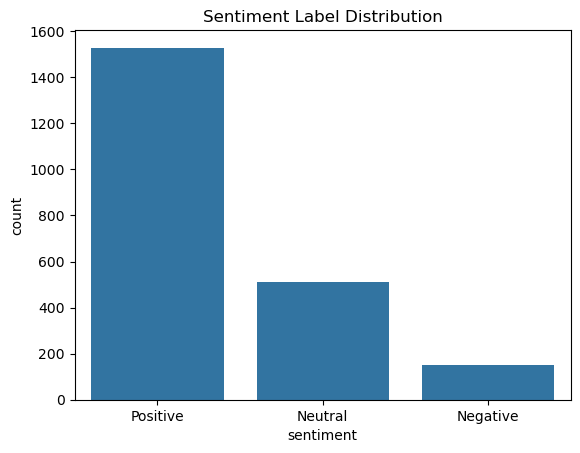

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Label Distribution')
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Subject    2191 non-null   object
 1   body       2191 non-null   object
 2   date       2191 non-null   object
 3   from       2191 non-null   object
 4   sentiment  2191 non-null   object
dtypes: object(5)
memory usage: 85.7+ KB


In [ ]:
## Exploratory Data Analysis (EDA)

In [15]:
df.describe(include='all')

,Subject,body,date,from,sentiment
count,2191,2191,2191,2191,2191
unique,1251,1539,690,10,3
top,(No Subject),\n\n,7/1/2011,lydia.delgado@enron.com,Positive
freq,141,21,9,284,1528


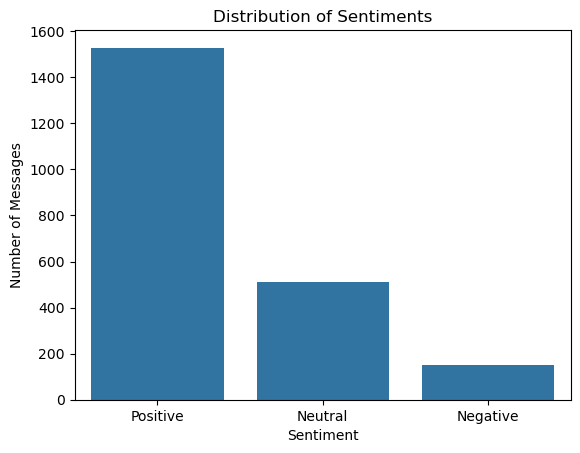

sentiment
Positive    1528
Neutral      511
Negative     152
Name: count, dtype: int64


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Messages')
plt.show()

print(df['sentiment'].value_counts())

In [19]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df[df['date'].isnull()]

,Subject,body,date,from,sentiment


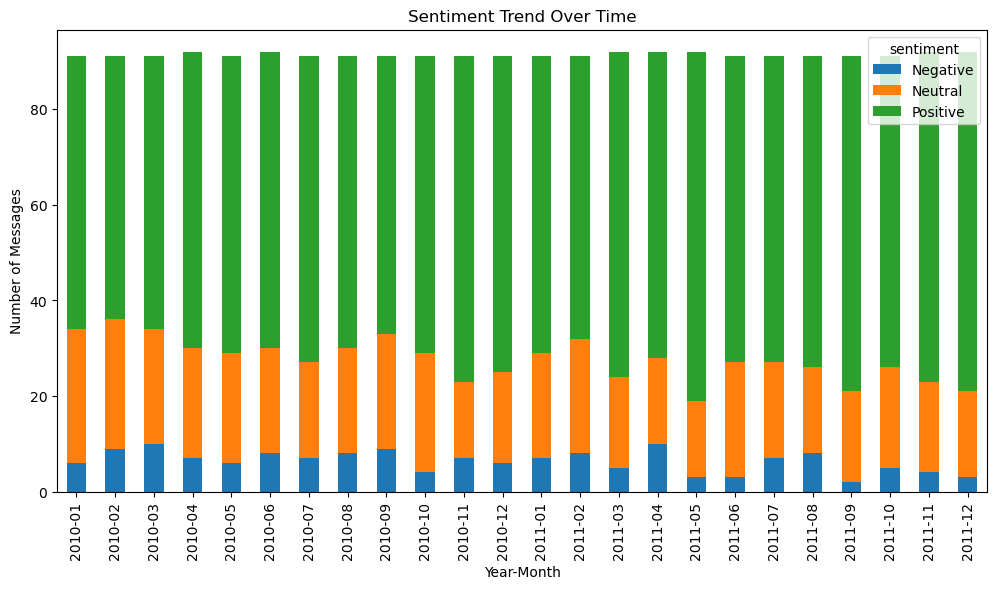

In [21]:
df['year_month'] = df['date'].dt.to_period('M')

monthly_sentiment = df.groupby(['year_month', 'sentiment']).size().unstack()

monthly_sentiment.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Sentiment Trend Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Messages')
plt.show()

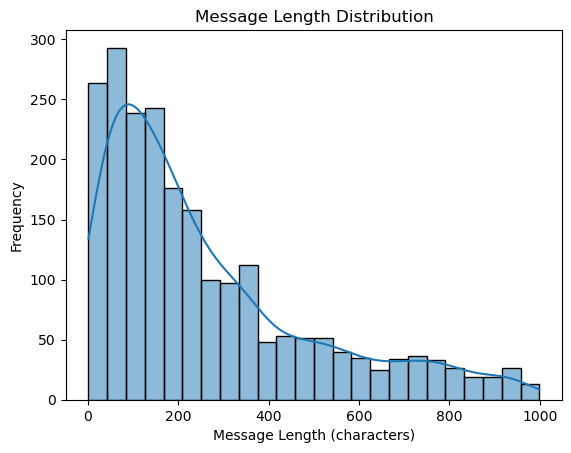

In [23]:
df['message_length'] = df['body'].apply(lambda x: len(str(x)))

sns.histplot(df['message_length'], kde=True)
plt.title('Message Length Distribution')
plt.xlabel('Message Length (characters)')
plt.ylabel('Frequency')
plt.show()

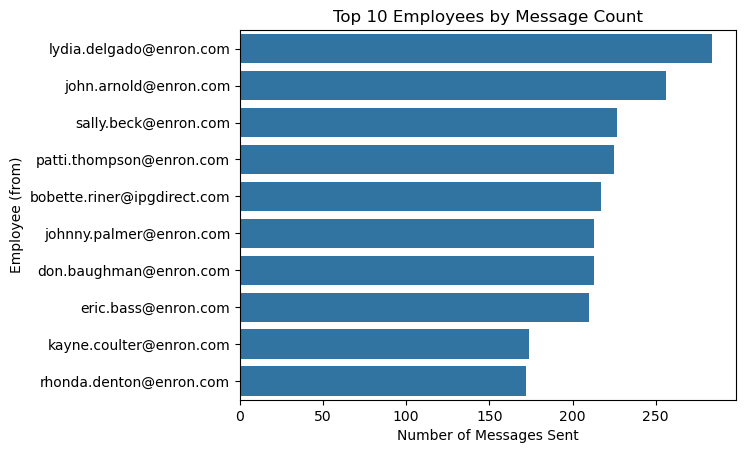

In [25]:
top_senders = df['from'].value_counts().head(10)

sns.barplot(x=top_senders.values, y=top_senders.index)
plt.title('Top 10 Employees by Message Count')
plt.xlabel('Number of Messages Sent')
plt.ylabel('Employee (from)')
plt.show()

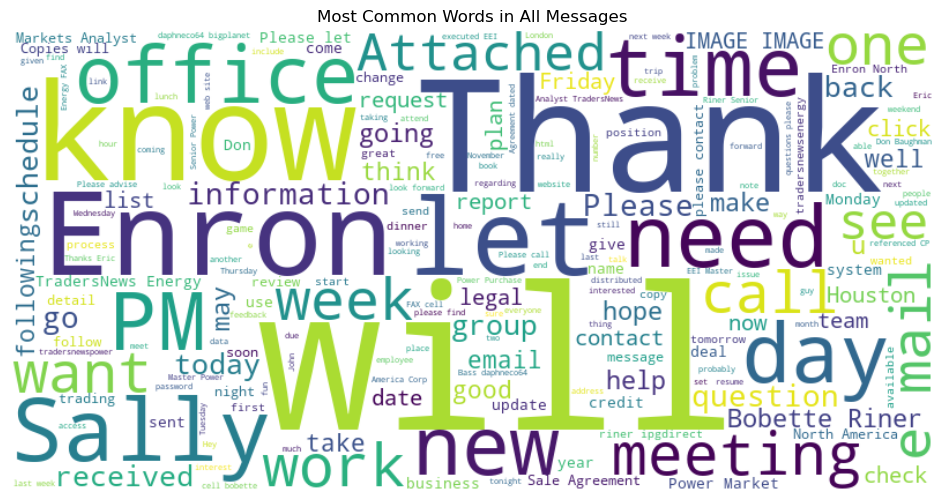

In [27]:
from wordcloud import WordCloud

text_combined = ' '.join(df['body'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in All Messages')
plt.show()

In [ ]:
## Employee Score Calculation

In [29]:
sentiment_map = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
df['score'] = df['sentiment'].map(sentiment_map)

df[['from', 'sentiment', 'score']].head()

,from,sentiment,score
0,sally.beck@enron.com,Positive,1
1,eric.bass@enron.com,Positive,1
2,sally.beck@enron.com,Neutral,0
3,johnny.palmer@enron.com,Neutral,0
4,lydia.delgado@enron.com,Positive,1


In [31]:
df['year_month'] = df['date'].dt.to_period('M')
df[['date', 'year_month']].head()

,date,year_month
0,2010-05-10,2010-05
1,2010-07-29,2010-07
2,2011-07-25,2011-07
3,2010-03-25,2010-03
4,2011-05-21,2011-05


In [33]:
monthly_scores = df.groupby(['from', 'year_month'])['score'].sum().reset_index()

monthly_scores.columns = ['employee_id', 'month', 'sentiment_score']
monthly_scores.head(10)

,employee_id,month,sentiment_score
0,bobette.riner@ipgdirect.com,2010-01,1
1,bobette.riner@ipgdirect.com,2010-02,7
2,bobette.riner@ipgdirect.com,2010-03,6
3,bobette.riner@ipgdirect.com,2010-04,3
4,bobette.riner@ipgdirect.com,2010-05,2
5,bobette.riner@ipgdirect.com,2010-06,2
6,bobette.riner@ipgdirect.com,2010-07,8
7,bobette.riner@ipgdirect.com,2010-08,4
8,bobette.riner@ipgdirect.com,2010-09,2
9,bobette.riner@ipgdirect.com,2010-10,6


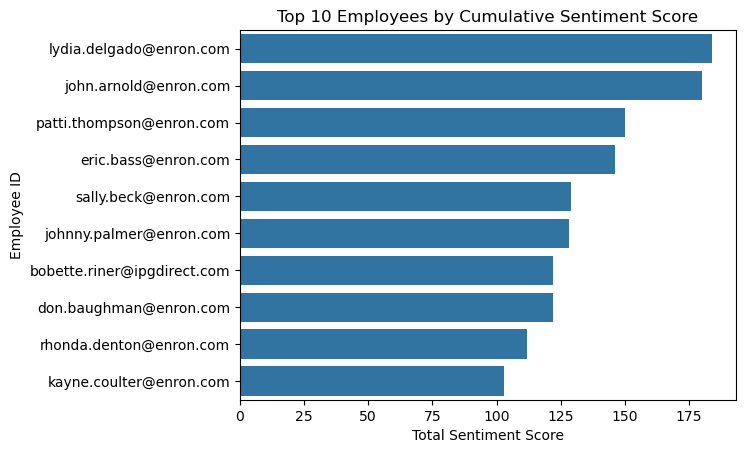

In [35]:
total_scores = monthly_scores.groupby('employee_id')['sentiment_score'].sum().sort_values(ascending=False)

top_10 = total_scores.head(10)

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=top_10.values, y=top_10.index)
plt.title('Top 10 Employees by Cumulative Sentiment Score')
plt.xlabel('Total Sentiment Score')
plt.ylabel('Employee ID')
plt.show()

In [ ]:
## Employee Ranking

In [37]:
top_positive = monthly_scores.groupby('month').apply(
    lambda x: x.nlargest(3, 'sentiment_score')
).reset_index(drop=True)

top_positive = top_positive.sort_values(by=['month', 'sentiment_score', 'employee_id'], ascending=[True, False, True])
top_positive.head(10)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17912\1596766519.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_positive = monthly_scores.groupby('month').apply(


,employee_id,month,sentiment_score
0,kayne.coulter@enron.com,2010-01,13
1,eric.bass@enron.com,2010-01,9
2,lydia.delgado@enron.com,2010-01,9
3,john.arnold@enron.com,2010-02,11
4,johnny.palmer@enron.com,2010-02,10
5,bobette.riner@ipgdirect.com,2010-02,7
6,sally.beck@enron.com,2010-03,11
7,john.arnold@enron.com,2010-03,7
8,bobette.riner@ipgdirect.com,2010-03,6
9,don.baughman@enron.com,2010-04,9


In [39]:
top_negative = monthly_scores.groupby('month').apply(
    lambda x: x.nsmallest(3, 'sentiment_score')
).reset_index(drop=True)

top_negative = top_negative.sort_values(by=['month', 'sentiment_score', 'employee_id'], ascending=[True, True, True])

top_negative.head(10)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17912\883736857.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_negative = monthly_scores.groupby('month').apply(


,employee_id,month,sentiment_score
0,bobette.riner@ipgdirect.com,2010-01,1
1,johnny.palmer@enron.com,2010-01,1
2,rhonda.denton@enron.com,2010-01,1
3,kayne.coulter@enron.com,2010-02,1
4,lydia.delgado@enron.com,2010-02,1
5,patti.thompson@enron.com,2010-02,1
6,rhonda.denton@enron.com,2010-03,1
7,don.baughman@enron.com,2010-03,2
8,kayne.coulter@enron.com,2010-03,3
9,eric.bass@enron.com,2010-04,2


In [ ]:
## Flight Risk Identification

In [41]:
negative_msgs = df[df['sentiment'] == 'Negative'].copy()

negative_msgs = negative_msgs.sort_values(by=['from', 'date'])

negative_msgs.head()

,Subject,body,date,from,sentiment,year_month,message_length,score
1330,Re: $,sorry if we do around 80\n\n\n\n\nBryan Hull\n...,2010-02-21,bobette.riner@ipgdirect.com,Negative,2010-02,60,-1
598,No trades with PG&E,No trades with PG&E until further notice.\n\nK...,2010-03-07,bobette.riner@ipgdirect.com,Negative,2010-03,48,-1
2163,Re:,"Frank,\n\nThe implied risk created by the san ...",2010-07-15,bobette.riner@ipgdirect.com,Negative,2010-07,396,-1
341,Conference Call on Wednesday morning,I had to report for jury duty today (along wit...,2010-08-06,bobette.riner@ipgdirect.com,Negative,2010-08,368,-1
120,Re: Vandy,BRUTAL!\n\n\n \n\tEnron North America Corp.\...,2010-08-26,bobette.riner@ipgdirect.com,Negative,2010-08,124,-1


In [43]:
negative_msgs['date'] = pd.to_datetime(negative_msgs['date'])

flight_risk_employees = set()

for emp_id in negative_msgs['from'].unique():
    emp_msgs = negative_msgs[negative_msgs['from'] == emp_id].copy()
    emp_msgs = emp_msgs.set_index('date')
    
    rolling_counts = emp_msgs['sentiment'].rolling('30D').count()
    
    if (rolling_counts >= 4).any():
        flight_risk_employees.add(emp_id)

flight_risk_employees = list(flight_risk_employees)

print("Flight Risk Employees:", flight_risk_employees)

Flight Risk Employees: ['johnny.palmer@enron.com', 'bobette.riner@ipgdirect.com', 'sally.beck@enron.com', 'don.baughman@enron.com']


In [ ]:
##Predictive Modeling

In [45]:
df['word_count'] = df['body'].astype(str).apply(lambda x: len(x.split()))

df['message_length'] = df['body'].astype(str).apply(len)

In [47]:
monthly_features = df.groupby(['from', 'year_month']).agg({
    'score': 'sum',
    'message_length': 'mean',
    'word_count': 'mean',
    'body': 'count' 
}).reset_index()

monthly_features.columns = ['employee_id', 'month', 'sentiment_score', 'avg_message_length', 'avg_word_count', 'message_count']

monthly_features.head()

,employee_id,month,sentiment_score,avg_message_length,avg_word_count,message_count
0,bobette.riner@ipgdirect.com,2010-01,1,115.000000,18.500000,2
1,bobette.riner@ipgdirect.com,2010-02,7,295.714286,43.928571,14
2,bobette.riner@ipgdirect.com,2010-03,6,286.181818,44.272727,11
3,bobette.riner@ipgdirect.com,2010-04,3,226.500000,31.833333,6
4,bobette.riner@ipgdirect.com,2010-05,2,172.250000,30.250000,4


In [49]:
from sklearn.model_selection import train_test_split

X = monthly_features[['avg_message_length', 'avg_word_count', 'message_count']]

y = monthly_features['sentiment_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [53]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²) Score:", r2)

Mean Squared Error (MSE): 3.3307828066518748
R-squared (R²) Score: 0.719912274662363


In [55]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print(coefficients)

              Feature  Coefficient
0  avg_message_length    -0.002684
1      avg_word_count     0.030329
2       message_count     0.628183
